### Step by step PCA implementation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

### Step 1: Create random data
Create data by randomly drawing samples from a multivariate normal distribution. We will start with 2-dimensional data.

Mu  (2,)
Sigma  (2, 2)
Data shape  (1000, 2)


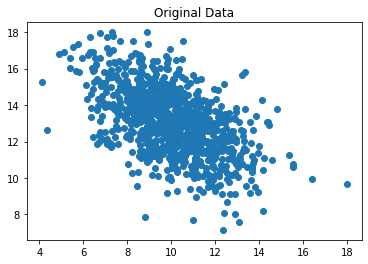

In [4]:
# Create random 2d data
mu = np.array([10,13])
sigma = np.array([[3.5, -1.8], [-1.8,3.5]])

print("Mu ", mu.shape)
print("Sigma ", sigma.shape)

# Create 1000 samples using mean and sigma
org_data = rnd.multivariate_normal(mu, sigma, size=(1000))
print("Data shape ", org_data.shape)
plt.plot(org_data[:, 0], org_data[:, 1], 'o')
plt.title('Original Data');

### Step 2: Mean Centering/ Normalize data
Before PCA, we standardize/ normalize data.

Mean  (2,)
Data after subtracting mean  (1000, 2) 



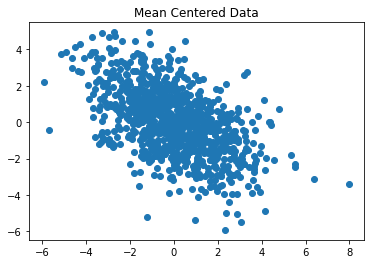

In [5]:
# Subtract mean from data
mean = np.mean(org_data, axis= 0)
print("Mean ", mean.shape)
mean_data = org_data - mean
print("Data after subtracting mean ", org_data.shape, "\n")

plt.plot(mean_data[:, 0], mean_data[:, 1], 'o')
plt.title('Mean Centered Data');

### Step 3: Compute the covariance matrix
Now, we compute the covariance of all features dimensions. Every covariance matrix is symmetric and positive semi-definite. It has orthogonal eigen vectors.

In [6]:
# Compute covariance matrix
cov = np.cov(mean_data.T)
cov = np.round(cov, 2)
print("Covariance matrix ", cov.shape, "\n")


Covariance matrix  (2, 2) 



### Step 4: Compute eigen vectors of the covariance matrix

In [7]:
# Perform eigen decomposition of covariance matrix
eig_val, eig_vec = np.linalg.eig(cov)
print("Eigen vectors ", eig_vec)
print("Eigen values ", eig_val, "\n")

Eigen vectors  [[ 0.72942225  0.68406373]
 [-0.68406373  0.72942225]]
Eigen values  [5.11869033 1.53130967] 



In [8]:
# Sort eigen values and corresponding eigen vectors in descending order
indices = np.arange(0,len(eig_val), 1)
indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]
print("Sorted Eigen vectors ", eig_vec)
print("Sorted Eigen values ", eig_val, "\n")

Sorted Eigen vectors  [[ 0.72942225  0.68406373]
 [-0.68406373  0.72942225]]
Sorted Eigen values  [5.11869033 1.53130967] 



### Step 5: Compute the explained variance and select N components
We can select top k eigen vectors based on how much compression do we want.

In [9]:
# Get explained variance
sum_eig_val = np.sum(eig_val)
print('Sum =', sum_eig_val)
explained_variance = eig_val/ sum_eig_val
print('Explained_variance :',explained_variance)

cumulative_variance = np.cumsum(explained_variance)
print('Cumulative_variance',cumulative_variance)

Sum = 6.65
Explained_variance : [0.76972787 0.23027213]
Cumulative_variance [0.76972787 1.        ]


### Step 6: Transform Data using eigen vectors
Now, we will take the dot product of our data with the eigen vectors to get projections of our data in the direction of these eigen vectors.

Transformed data  (1000, 2)


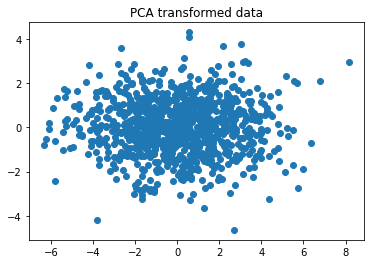

In [10]:
# Take transpose of eigen vectors with data
pca_data = np.dot(mean_data, eig_vec)
print("Transformed data ", pca_data.shape)

plt.plot(pca_data[:, 0], pca_data[:, 1], 'o')
plt.title('PCA transformed data');

### Step 7: Invert PCA and Reconstruct original data

X = X — mean

pca_X = X * V

recon_X = (pca_X * V’) + mean= ((X*V) * V’) + mean = (X * (V*V’)) + mean= (X*I) + mean = X + mean


In [13]:
import numpy as np
recon_data = np.dot(mean_data,np.transpose(eig_vec))+mean
print('Reconstructed data shape:',recon_data.shape)

Reconstructed data shape: (1000, 2)


In [14]:
# Compute reconstruction loss
loss = np.mean(np.square(recon_data - org_data))
print("Reconstruction loss ", loss)

Reconstruction loss  1.7961970316264095


### Dimensionality Reduction: Principal Component Analysis in-depth
Here we'll explore Principal Component Analysis, which is an extremely useful linear dimensionality reduction technique. Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data. Look for directions in the data with the most variance.

Useful to explore data, visualize data and relationships.

It's easiest to visualize by looking at a two-dimensional dataset:

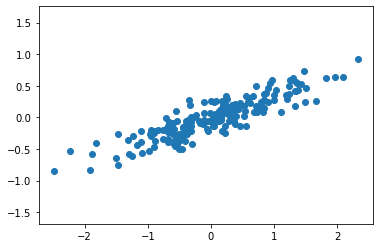

In [15]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

We can see that there is a definite trend in the data. What PCA seeks to do is to find the Principal Axes in the data, and explain how important those axes are in describing the data distribution:

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print('Explained variance : ', pca.explained_variance_)
print('PCA : ', pca.components_)

Explained variance :  [0.7625315 0.0184779]
PCA :  [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


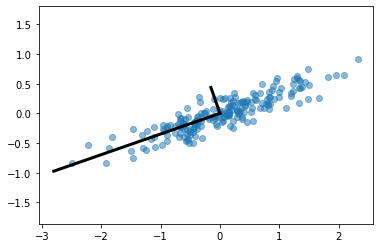

In [17]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_ratio_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

Notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction. The explained variance quantifies this measure of "importance" in direction.

Another way to think of it is that the second principal component could be completely ignored without much loss of information! Let's see what our data look like if we only keep 95% of the variance:

In [18]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


Isomap: manifold learning, good when PCA doesn't work like in a loop. Large number of datasets, can use randomized PCA.

By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

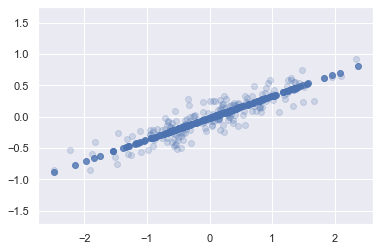

In [6]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version. We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!

This is the sense in which "dimensionality reduction" works: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data.

### Dimensionality Reduction with PCA

In [19]:
from sklearn import neighbors, datasets

import pylab as pl

#seaborn.set()

iris = datasets.load_iris()

X, y = iris.data, iris.target
#print(X)
print('Number of cases:', len(X))
print('Inputs shape:', X.shape)

Number of cases: 150
Inputs shape: (150, 4)


Reduced dataset shape: (150, 2)
Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


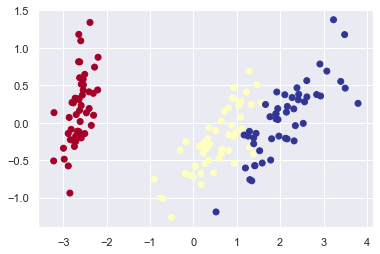

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn import neighbors, datasets

import pylab as pl

seaborn.set()

iris = datasets.load_iris()

X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))